In [1]:
# Configure plotting functions
%matplotlib inline

In [2]:
# Configure libraries
import quandl
import pandas as pd
from fbprophet import Prophet

# Configure Quandl access
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

Importing plotly failed. Interactive plots will not work.


In [26]:
# Get Data
data = quandl.get("BCB/UDJIAD1") #Dow Jones Industrial Average

In [27]:
# Examine data
data.tail()

,Value
Date,
2016-04-11,17556.41
2016-04-12,17721.25
2016-04-13,17908.28
2016-04-14,17926.43
2016-04-15,17897.46


<AxesSubplot:xlabel='Date'>

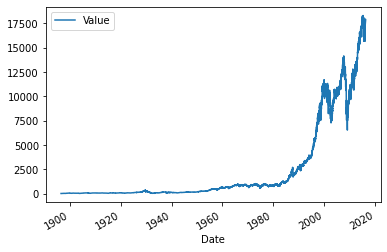

In [28]:
# Plot Data
data.plot()

In [29]:
# Transform data
data_sub = data["2010-01-01":]
prophet_data = data_sub.reset_index()
prophet_data.columns = ["ds", "y"]
prophet_data.head()

,ds,y
0,2010-01-04,10583.96
1,2010-01-05,10572.02
2,2010-01-06,10573.68
3,2010-01-07,10606.86
4,2010-01-08,10618.19


In [30]:
# Fit model
m = Prophet()
m.fit(prophet_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
# Generate predictions
future = m.make_future_dataframe(periods=3*365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2672,2019-04-11,14803.937147,7274.891461,21856.015529
2673,2019-04-12,14797.684532,7324.351250,21872.513510
2674,2019-04-13,14874.251415,7316.746644,21984.902902
2675,2019-04-14,14871.895005,7092.938139,21753.045230
2676,2019-04-15,14784.559473,7169.348878,21847.076233


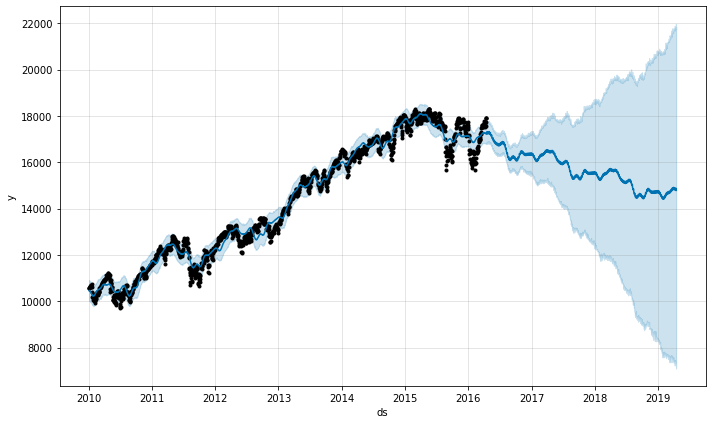

In [32]:
# Plot result
fig1 = m.plot(forecast)